In [1]:
%%html
<style>
.prompt_container { display: none !important; }
.prompt { display: none !important; }
.run_this_cell { display: none !important; }


</style>

# ProgRes, Part II

# Web services

Fabien Mathieu - fabien.mathieu@normalesup.org

Sébastien Tixeuil - Sebastien.Tixeuil@lip6.fr

# Roadmap

- Part I: done
- Part II (Web services)
  - This week:
    - Definitions / Reminders (OSI, HTTP, REST...)
    - Client side
       - Retrieve content
       - Manipulate content
  - Next week: Server side
- Part III: P2P

# Methodology

- Course, practicals, and mini-projects are made on notebooks (jupyter or jupyterlab)
- Available on Github: https://github.com/balouf/progres
- This means you will send your practical notebooks. 
- Please put your name(s) **on the filename AND inside** as well!

# Jupyter notebook?

A notebook is just a text file with extension `.ipynb` that contains cells.
- Two main types of cells:
  - Markdown cells to write formatted text. You can itemize or write maths like $\frac{\sqrt{\pi}}{2}$
  - Code cell to execute Python code
- This is a markdown cell

In [ ]:
# This is a code cell
x = 1+1

In [ ]:
# Cell codes share the same workspace
x

# Using Jupyter Notebook

Two modes:
- Command mode (blue). Hit `esc` to enter it
- Edit mode (green). Hit `enter` on a cell to edit
- There are many shortcuts (hit `H` on command mode to see them)

# The rules

https://github.com/balouf/progres/blob/main/rules.ipynb

## What is a Web Service?

# Reminder: the OSI model

| Layer | Protocol Data Unit (PDU) | Function |
| :-- | --- | :-: |
| 7 (Application) | Data | High-level protocols such as for resource sharing or remote file access, e.g. HTTP. |
| 6 (Presentation) | Data | Translation of data between a networking service and an application;<br>including character encoding, data compression and encryption/decryption. |
| 5 (Session) | Data | Managing communication sessions, i.e.,<br>continuous exchange of information in the form of multiple back-and-forth transmissions between two nodes. |
| 4 (Transport) | Segment, datagram | Reliable transmission of data segments between points on a network,<br>including segmentation, acknowledgement and multiplexing. |
| 3 (Network) | Packet | Structuring and managing a multi-node network, including addressing, routing and traffic control. |
| 2 (Data link) | Frame, PRB | Transmission of data frames between two nodes connected by a physical layer. |
| 1 (Physical) | Bit, Symbol | Transmission and reception of raw bit streams over a physical medium. |

From wikipedia

# Reminder: the OSI model

- OSI should be seen as a guideline more than strict frontiers
- 1 & 2 (physical layers): depend on the physical medium you use
- 3 & 4 (Internet layers): IP (3), UDP ("3.5"), TCP (4)
- Data layers: HTTP(S), SSH, SMTP, (S)FTP... (some see 5/6/7 distinction as artificial)

# The OSI hourglass

Just for Internet culture

- Many physical implementations
- Many data applications
- One waist: IP

<img src = "https://scx2.b-cdn.net/gfx/news/hires/2011/howtheintern.jpg">

# OSI model and PROGRES

- Part I (past sessions) was making your own data layers out of sockets
- Part II is about directly using L7 protocols
- Part III will be about overlay networks ("L8")

# HTTP in the old days (Web 1.0)

- Goal: serve a (static) web page
- Client (user on a navigator) requests a URL
- Server serves a physical file (or a view of a directory)
- Navigator displays the page

- https://files.data.gouv.fr/insee-sirene/
- http://test-debit.free.fr/

- HTTP: HyperText Transfert Protocol
- URL: Uniform Resource Locator

# HTTPS today (Web X.Y)

- Goal: C asks R to S using a URI
- C is anything
- R is anything
- S is a server
- https://pokeapi.co/api/v2/pokemon-form/25/
- https://api.archives-ouvertes.fr/search/?q=authIdHal_s:fabien-mathieu

- HTTPS: HyperText Transfert Protocol Secure
- URI: Uniform Resource Identifier

# Web services

- Client is typically a program executed to access content
 - On client side (JS of a webpage)
 - On server side (to *build* the webpage to return)
- Request is a HTTP(S) method on a URI
- Result is anything (None, html, xml, json, image...)

# HTTP(S) methods

Any HTTP(S) method is like this:
- A request is sent by the client, with some headers (type of request, ...) and possibly a body (input data)
- A response is sent by the server, with some headers (status code, metadata) and possibly a body (output data)

# HTTP methods: theory

From wikipedia:
- **GET**: requests data from the target resource. GET requests should only retrieve data. All data is in the URI (useful for caching).
- **HEAD**: like GET, but don't actually send the data. Uses include checking whether a page is available through the status code and quickly finding the size of a file (Content-Length).
- **POST**: requests the target to process some resources (data) sent by the client. Posted data is not on the URI. For example, it is used for posting a message to an Internet forum, subscribing to a mailing list, or completing an online shopping transaction.
- **PUT**: requests to create or update using the data enclosed in the request. A distinction from POST is that the client specifies the target location on the server.
- **DELETE**: requests suppression of entry.
- **CONNECT**: establishes a TCP/IP tunnel. It is often used to secure connections through one or more HTTP proxies with TLS.
- **OPTIONS**: requests that the supported HTTP methods that it supports. This can be used to check the functionality of a web server.
- **TRACE**: transfers the received request in the response body. That way a client can see what (if any) changes or additions have been made by intermediaries.
- **PATCH**: modifies part(s) of entry. This can save bandwidth by updating a part of a file or document without having to transfer it entirely.

# HTTP methods in practice: GET or POST?

- **GET** can perform all methods (e.g. "http://my.server.co/uri?method=POST&data=...")
- Same for **POST** (which is a GET with hidden data)
- 99% of methods used in the real world are GET or POST

# HTTP methods: GET?

- All request information is visible in the URI
- Human can write a GET in the browser
- Useful for caching / bookmarking
- Good practice: use get to read

# HTTP methods: POST?

- Hide some request information inside the sent message
- Usually performed by forms / javascript
- Useful for sending login / password
- Good practice: use post to write (and password)

# Anatomy of a GET method: inspect

The browser way: Inspect

https://pokeapi.co/api/v2/pokemon-form/25/

# Anatomy of a GET method: within Python

The requests package (that we will use intensively) gives you all.

In [2]:
from requests import get
request = get("https://pokeapi.co/api/v2/pokemon-form/25/")
print(f"Request headers: {request.request.headers}")
print(f"Response headers: {request.headers}")

Request headers: {'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}
Response headers: {'Date': 'Fri, 11 Oct 2024 07:09:19 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Content-Length': '336', 'Connection': 'keep-alive', 'Cache-Control': 'public, max-age=86400, s-maxage=86400', 'Content-Encoding': 'gzip', 'etag': 'W/"4f8-9UFHCQTIN7577Tbo+plk2O2VsR0"', 'strict-transport-security': 'max-age=31556926', 'x-country-code': 'US', 'x-orig-accept-language': 'en-US,en;q=0.9,fr;q=0.8,es;q=0.7,en-CA;q=0.6', 'x-powered-by': 'Express', 'x-served-by': 'cache-mia-kmia1760075-MIA', 'x-cache': 'MISS', 'x-cache-hits': '0', 'x-timer': 'S1720447922.371344,VS0,VE265', 'vary': 'Origin, Accept-Encoding,cookie,need-authorization, x-fh-requested-host, accept-encoding', 'alt-svc': 'h3=":443"; ma=86400', 'CF-Cache-Status': 'HIT', 'Age': '83323', 'Accept-Ranges': 'bytes', 'Report-To': '{"endpoints":[{"url":"https:\\/\\/a.nel.cloudfla

# Anatomy of a GET method: within Python

In [3]:
print(f"Status code: {request.status_code}")
print(f"Method: {request.request.method}")

Status code: 200
Method: GET


In [4]:
{k: v for k, v in request.json().items() if k != 'sprites'}

{'form_name': '',
 'form_names': [],
 'form_order': 1,
 'id': 25,
 'is_battle_only': False,
 'is_default': True,
 'is_mega': False,
 'name': 'pikachu',
 'names': [],
 'order': 36,
 'pokemon': {'name': 'pikachu',
  'url': 'https://pokeapi.co/api/v2/pokemon/25/'},
 'types': [{'slot': 1,
   'type': {'name': 'electric', 'url': 'https://pokeapi.co/api/v2/type/13/'}}],
 'version_group': {'name': 'red-blue',
  'url': 'https://pokeapi.co/api/v2/version-group/1/'}}

# Anatomy of a POST method: within Python

We will use https://httpbin.org, a website to test http requests.

In [5]:
from requests import post
request = post("https://httpbin.org/post", json={'Hello': 'world', 'Answer': 42, 'password': 'MyPrivatePassword'})

# Anatomy of a POST method: within Python

In [7]:
print(f"Status code: {request.status_code}")
print(f"Method: {request.request.method}")
print(f"Request headers: {request.request.headers}")
print(f"Response headers: {request.headers}")

Status code: 200
Method: POST
Request headers: {'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Content-Length': '65', 'Content-Type': 'application/json'}
Response headers: {'Date': 'Fri, 11 Oct 2024 07:09:29 GMT', 'Content-Type': 'application/json', 'Content-Length': '594', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}


# Anatomy of a POST method: within Python

In [8]:
print(request.text)

{
  "args": {}, 
  "data": "{\"Hello\": \"world\", \"Answer\": 42, \"password\": \"MyPrivatePassword\"}", 
  "files": {}, 
  "form": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "65", 
    "Content-Type": "application/json", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.31.0", 
    "X-Amzn-Trace-Id": "Root=1-6708cf29-5752b01850215f0235fcca8f"
  }, 
  "json": {
    "Answer": 42, 
    "Hello": "world", 
    "password": "MyPrivatePassword"
  }, 
  "origin": "5.51.223.252", 
  "url": "https://httpbin.org/post"
}



# REST API

- REpresentational State Transfert Application Programming Interface is a simple, relatively normalized, way of performing web services.
- Response is typically json or xml.

https://pokeapi.co/api/v2/pokemon-form/25/

- Method is GET (implicit)
- https://pokeapi.co/api/ is the base URL of the URI
- v2 is the API version
- pokemon-form/25/ is the actual request (fetch Pikachu!)

## Client Side

### Retrieve data

# Retrieve data

Data can be:
- Arbitrary bytes (image, pdf, binary...)
- Text
- Structured text (html, json, ...)

You need to adapt:
- Load in memory or save to file?
- Don't load a text as bytes or a json as text!

# Retrieve with requests

In [9]:
from requests import Session
manga = "https://lelscans.net"
s = Session() # Sessions make better performance
r = s.get(manga)
print(f"Request status is {r.status_code},\n"
 f"Content length is {len(r.content)} bytes,\n"
 f"Request encoding is {r.encoding},\n"
 f"Text size is {len(r.text)} chars.")
print(f"Response headers: {r.headers}")

Request status is 200,
Content length is 67291 bytes,
Request encoding is UTF-8,
Text size is 67285 chars.
Response headers: {'Date': 'Fri, 11 Oct 2024 07:11:04 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': 'mobile_lelscan=0; expires=Sat, 12-Oct-2024 07:11:04 GMT; Max-Age=86400; path=lelscans.net', 'Vary': 'Accept-Encoding', 'cf-cache-status': 'DYNAMIC', 'Report-To': '{"endpoints":[{"url":"https:\\/\\/a.nel.cloudflare.com\\/report\\/v4?s=40bYEbupsBamWRWdDNWAjP7dqE%2BBeX0QqhK6j5%2FuTTCM88w3pnMPjIwbiCA9CTZyc%2BYkZuRG2WfKM37jBxPK0VCbvkYyjAtJJGUVl1pfcVD5ojrZsdsSkoskzgJZBftvSAdQq89ig1O0X8Y%3D"}],"group":"cf-nel","max_age":604800}', 'NEL': '{"success_fraction":0,"report_to":"cf-nel","max_age":604800}', 'Speculation-Rules': '"/cdn-cgi/speculation"', 'Server': 'cloudflare', 'CF-RAY': '8d0d08b5b90701ef-CDG', 'Content-Encoding': 'gzip', 'alt-svc': 'h3=":443"; ma=86400'}


# Retrieve with requests

In [12]:
r.text[:1000]

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head>\r\n<title>One Piece lecture en ligne scan</title>\r\n\t<meta name="description" content="One Piece Lecture en ligne, tous les scan One Piece." /> \r\n\t<meta name="lelscan" content="One Piece" />\r\n\t<meta http-equiv="Content-Type" content="text/html;charset=ISO-8859-1" />\r\n\t<meta http-equiv="Content-Language" content="fr" />\r\n\t<meta name="keywords" content="One Piece lecture en ligne, lecture en ligne One Piece, scan One Piece, One Piece scan, One Piece lel, lecture en ligne One Piece, Lecture, lecture,  scan, chapitre, chapitre One Piece, lecture One Piece, lecture Chapitre One Piece, mangas, manga, One Piece, One Piece fr, One Piece france, scans, image One Piece " /> \r\n\t<meta name="subject" content="One Piece lecture en ligne scan" />\r\n\t<meta name="identifier-url" content="https://lelscans.ne

# Retrieve with requests

In [13]:
r.content[:1000]

b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head>\r\n<title>One Piece lecture en ligne scan</title>\r\n\t<meta name="description" content="One Piece Lecture en ligne, tous les scan One Piece." /> \r\n\t<meta name="lelscan" content="One Piece" />\r\n\t<meta http-equiv="Content-Type" content="text/html;charset=ISO-8859-1" />\r\n\t<meta http-equiv="Content-Language" content="fr" />\r\n\t<meta name="keywords" content="One Piece lecture en ligne, lecture en ligne One Piece, scan One Piece, One Piece scan, One Piece lel, lecture en ligne One Piece, Lecture, lecture,  scan, chapitre, chapitre One Piece, lecture One Piece, lecture Chapitre One Piece, mangas, manga, One Piece, One Piece fr, One Piece france, scans, image One Piece " /> \r\n\t<meta name="subject" content="One Piece lecture en ligne scan" />\r\n\t<meta name="identifier-url" content="https://lelscans.n

# Example: remote file size

In [14]:
def get_size(url):
    s = Session()
    r = s.head(url)
    return int(r.headers['Content-Length'])

In [15]:
url = "http://ftp.crifo.org/debian-cd/current/amd64/iso-dvd/debian-12.7.0-amd64-DVD-1.iso"
get_size(url)

3994091520

# Example: stream downloading

In [16]:
from pathlib import Path
def download(source_url, dest_file):
    s = Session()
    s.verify = False
    r = s.get(source_url, stream=True)
    dest_file = Path(dest_file)
    with open(dest_file, "wb") as f:
        for chunk in r.iter_content(chunk_size=8192):
            if chunk: 
                f.write(chunk)

In [17]:
url = "https://www-npa.lip6.fr/~tixeuil/m2r/uploads/Main/PROGRES2025_2.pdf"
download(url, 'python.pdf')

C:\Users\fabienma\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www-npa.lip6.fr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


<a href="./python.pdf">python.pdf (local file)</a>

### Manipulate data

#### Basic string manipulation

# String manipulation

Even if you have structured data, you need to master basic string manipulations.

In [18]:
txt = " Python is a great language\n but Erlang is pretty cool too!  "
print(txt)

 Python is a great language
 but Erlang is pretty cool too!  


# Split

In [19]:
print(l1:=txt.split())
print(l2:=txt.split('a'))
print(l3:=txt.split('\n'))
print(l4:=txt.split('an'))

['Python', 'is', 'a', 'great', 'language', 'but', 'Erlang', 'is', 'pretty', 'cool', 'too!']
[' Python is ', ' gre', 't l', 'ngu', 'ge\n but Erl', 'ng is pretty cool too!  ']
[' Python is a great language', ' but Erlang is pretty cool too!  ']
[' Python is a great l', 'guage\n but Erl', 'g is pretty cool too!  ']


# Join

In [20]:
print(' '.join(l1))
print('a'.join(l2))
print('\n'.join(l3))
print('AN'.join(l4))

Python is a great language but Erlang is pretty cool too!
 Python is a great language
 but Erlang is pretty cool too!  
 Python is a great language
 but Erlang is pretty cool too!  
 Python is a great lANguage
 but ErlANg is pretty cool too!  


# Other methods

By default, `str` in Python have many powerful methods... Try them!

In [21]:
print(', '.join([method_name for method_name in dir(txt) 
                 if callable(getattr(txt, method_name)) and not method_name.startswith('_')]))

capitalize, casefold, center, count, encode, endswith, expandtabs, find, format, format_map, index, isalnum, isalpha, isascii, isdecimal, isdigit, isidentifier, islower, isnumeric, isprintable, isspace, istitle, isupper, join, ljust, lower, lstrip, maketrans, partition, removeprefix, removesuffix, replace, rfind, rindex, rjust, rpartition, rsplit, rstrip, split, splitlines, startswith, strip, swapcase, title, translate, upper, zfill


#### Regular Expression

# Regular Expressions

- More powerful
- More complex that basic methods
- Personal advice: don't use RegEx if you can avoid it
- Personal advice #2: sometimes, you cannot avoid it, so you need to learn

# Regular Expressions

Recipe:
- define a *pattern*
- apply pattern to a string
- you can:
  - find all pattern occurrences (`findall`)
  - substitute with another string (`sub`)
  - check if the pattern matches the string (`match`/`fullmatch`)
  - extract parts of the pattern (`group`)

# Defining a pattern

- a, X, 9, < -- ordinary characters just match themselves exactly.
- Some characters have special meanings: . ^ \$ * + ? { [ ] \ | ( ) (details below)
- . (a period) -- matches any single character except newline '\n'
- \w -- (lowercase w) matches a "word" character: a letter or digit or underscore [a-zA-Z0-9_]. \W matches any non-word character. 
- \b -- boundary between word and non-word 
- \s -- (lowercase s) matches a single whitespace character -- space, newline, return, 
tab, form [ \n\r\t\f]. \S (upper case S) matches any non-whitespace 
character.

# Defining a pattern

- \t, \n, \r -- tab, newline, return 
- \d -- decimal digit [0-9]
- \$=end—match the end of the string. ^ matches the start of the string but also means not
- \ -- inhibit the "specialness" of a character. So, for example, use \\. to match a 
period or \\\\ to match a backslash. If you are unsure if a character has special meaning, 
such as '@', you can put a slash in front of it, \@, to make sure it is treated just as a 
character

# Defining a pattern

- [] - set of possible characters
- | - or
- {n} - exactly n occurrences.
- () - create group 
- \+ - at least one occurrence.
- \* - zero or more occurrence.
- ? - zero or one occurrence. Also mean greedy match (`.*` vs `.*?`).

# Example: extract Email Information

In [22]:
import re
txt = 'fabien.mathieu@normalesup.com'
pattern = '([^@]+)@([^@]+\.[a-z]+)'
m = re.fullmatch(pattern, txt)
print(m.groups())

('fabien.mathieu', 'normalesup.com')


# Example: *manual* html parsing

https://www.lip6.fr/recherche/team_membres.php?acronyme=NPA

In [23]:
url = "https://www.lip6.fr/recherche/team_membres.php?acronyme=NPA"
r = s.get(url)
txt = r.text

# Example: *manual* html parsing

In [24]:
pattern1 = r"<table class='annuaire'>(.*?)</table>"
permanents = re.findall(pattern1, txt, re.DOTALL)[0]
permanents

'\n\t<tr>\n\t\t<td><a class="nouser" title="Pas de page personnelle" href="#"></a><a href=\'../actualite/personnes-fiche.php?ident=P224\'>Baey&nbsp;Sébastien</a> (Maître de Conférences, Sorbonne Université)</td>\n\t\t<td class=\'bureau\'>Campus Pierre et Marie Curie 26-00/103</td>\n\t</tr>\n\t<tr>\n\t\t<td><a class="nouser" title="Pas de page personnelle" href="#"></a><a href=\'../actualite/personnes-fiche.php?ident=P144\'>Baynat&nbsp;Bruno</a> (Maître de Conférences, Sorbonne Université)</td>\n\t\t<td class=\'bureau\'>Campus Pierre et Marie Curie 26-00/112</td>\n\t</tr>\n\t<tr>\n\t\t<td><a class="user" title="Page personnelle" href="http://www-npa.lip6.fr/~bramas/"></a><a href=\'../actualite/personnes-fiche.php?ident=P1678\'>Bramas&nbsp;Quentin</a> (Maître de Conférences, Sorbonne Université)</td>\n\t\t<td class=\'bureau\'>Campus Pierre et Marie Curie 26-00/128</td>\n\t</tr>\n\t<tr>\n\t\t<td><a class="user" title="Page personnelle" href="http://lip6.fr/Binh-Minh.Bui-Xuan"></a><strong>

# Example: *manual* html parsing

In [26]:
pattern = r"<a href=.*?>([^<]*?)</a>.*?([0-9]{2}-[0-9]{2})/([0-9]{3})"
print("\n".join(f"{p[0].replace('&nbsp;', ' ')}: corridor {p[1]}, room {p[2]}" 
                for p in re.findall(pattern, permanents, re.DOTALL)))

Baey Sébastien: corridor 26-00, room 103
Baynat Bruno: corridor 26-00, room 112
Bramas Quentin: corridor 26-00, room 128
Bui-Xuan Binh-Minh: corridor 26-00, room 122
Dias de Amorim Marcelo: corridor 26-00, room 109
Fdida Serge: corridor 26-00, room 111
Fladenmuller Anne: corridor 26-00, room 108
Fossati Francesca: corridor 26-00, room 117
Fourmaux Olivier: corridor 26-00, room 103
Friedman Timur: corridor 26-00, room 107
Kervella Brigitte: corridor 26-00, room 105
Malouch Naceur: corridor 26-00, room 105
Potop-Butucaru Maria: corridor 26-00, room 115
Pujolle Guy: corridor 26-00, room 126
Thai Kim Loan: corridor 26-00, room 114
Tixeuil Sébastien: corridor 26-00, room 113


#### HTML parsing with BeautifulSoup

# BeautifulSoup

A much easier way to manipulate html!
- Make a soup (a navigable version of a string)
- Browse a soup 
- soup.find("tag") / soup.tag (returns soup)
- soup.find_all("tag") / soup("tag") (returns list)
- soup.find("tag", {'attr_name': 'attr_value'})
- soup.contents (list of children)
- soup.attrs: attributes

# BeautifulSoup

Extract text:
- soup.decode_contents(): returns soup as string
- soup.encode_contents(): returns soup as bytes
- soup.text: return soup as tagless string
- soup['attr_name']: return attribute value
- soup.name: tag name

# Back to RE example

In [27]:
from bs4 import BeautifulSoup as Soup
soup = Soup(r.text)
nbsp = '\xa0'
entries = soup.table('tr')
names = [ p('a')[1].text.replace(nbsp, ' ') for p in entries ]
locations = [p.find('td', {'class': 'bureau'}).text.split()[-1].split('/') for p in entries]
print('\n'.join(f"{n}: corridor {l[0]}, room {l[1]} " for n, l in zip(names, locations)))

Baey Sébastien: corridor 26-00, room 103 
Baynat Bruno: corridor 26-00, room 112 
Bramas Quentin: corridor 26-00, room 128 
Bui-Xuan Binh-Minh: corridor 26-00, room 122 
Dias de Amorim Marcelo: corridor 26-00, room 109 
Fdida Serge: corridor 26-00, room 111 
Fladenmuller Anne: corridor 26-00, room 108 
Fossati Francesca: corridor 26-00, room 117 
Fourmaux Olivier: corridor 26-00, room 103 
Friedman Timur: corridor 26-00, room 107 
Kervella Brigitte: corridor 26-00, room 105 
Malouch Naceur: corridor 26-00, room 105 
Potop-Butucaru Maria: corridor 26-00, room 115 
Pujolle Guy: corridor 26-00, room 126 
Thai Kim Loan: corridor 26-00, room 114 
Tixeuil Sébastien: corridor 26-00, room 113 


# Another example

https://www.lip6.fr/production/publications-type.php?id=-1&annee=2024&type_pub=COL

In [28]:
news = "https://www.lip6.fr/production/publications-type.php?id=-1&annee=2024&type_pub=COL"
soup = Soup(s.get(news).text)

# Another example

In [29]:
# First article
soup.find('div', {'class': 'encadre'}).li

<li><strong>N. Afroz, Ah. Sayem, G. Volanis, D. Maliuk, Haralampos‑G. Stratigopoulos, Y. Makris</strong> : “<a href="https://hal.science/hal-04555768">On the Sensitivity of Analog Artificial Neural Network Models to Process Variation</a>”, 42<sup>nd</sup> IEEE VLSI Test Symposium (VTS 2024), VTS24 proceedings, Tempe, AZ, United States [Afroz 2024]</li>

# Another example

In [30]:
# The 5 first articles: names and URL
for p in soup.find('div', {'class': 'encadre'}).find_all('li')[:5]:
    a = p.a
    print(a.text)
    print(a['href'])

On the Sensitivity of Analog Artificial Neural Network Models to Process Variation
https://hal.science/hal-04555768
Comparative E-Voting Security Evaluation: Multi-Modal Authentication Approaches
https://hal.science/hal-04650059
Recent advances on sparse direct solver using Block Low-Rank and mixed precision for large scale applications
https://hal.science/hal-04642783
CosyVerif: The Path to Formalisms Cohabitation
https://hal.science/hal-04610312
Contract Scheduling with Distributional and Multiple Advice
https://hal.science/hal-04550239


#### XML

# XML

- A human-readable way to represent data
- Introduced as a generalization / normalization of HTML
- Extensible Markup Language (XML) 
- Serializable (can be directly loaded/dumped from string)
- Used by many langages

# XML specification

XML is made of markups similar to HTML:
- tag: something that starts with < and ends with >.
  - start-tag, such as `<section>`
  - end-tag, such as `</section>`
  - empty-element tag, such as `<line-break />
- element: empty-element tag or anything between a start and matching tags (included)
- content: anything between a start and matching tags (excluded). Can contain text and/or element(s)
- attribute: key-value pairs stored inside a start or empty tag.

# Example #1

In [31]:
xml = """
<?xml version="1.0" encoding="UTF-8"?> 
<note> 
<to>Tove</to>
<from>Jani</from> 
<heading>Reminder</heading>
<body>Don't forget me this weekend!</body> 
</note>
"""

# Example #2

In [32]:
xml = """<?xml version="1.0"?> <data> 
<country name="Liechtenstein"> <rank>1</rank>
<year>2008</year> <gdppc>141100</gdppc>
<neighbor name="Austria" direction="E"/> 
<neighbor name="Switzerland" direction="W"/> 
</country>
<country name="Singapore"> 
<rank>4</rank>
<year>2011</year> <gdppc>59900</gdppc>
<neighbor name="Malaysia" direction="N"/> 
</country>
<country name="Panama"> 
<rank>68</rank>
<year>2011</year> <gdppc>13600</gdppc>
<neighbor name="Costa Rica" direction="W"/> 
<neighbor name="Colombia" direction="E"/> 
</country> </data> 
"""
with open('data.xml', 'wt') as f:
    f.write(xml)

# Parsing XML with the xml package

xml.etree.ElementTree loads the whole file, you can then navigate in the tree structure.

In [33]:
import xml.etree.ElementTree as ET
root = ET.parse('data.xml').getroot()
print(f"Main tag: {root.tag}; main attributes: {root.attrib}")
print(f"Text of second element of first element: {root[0][1].text}")
for child in root:
    print(child.tag, child.attrib)
for n in root.iter('neighbor'):
    print(n.attrib)

Main tag: data; main attributes: {}
Text of second element of first element: 2008
country {'name': 'Liechtenstein'}
country {'name': 'Singapore'}
country {'name': 'Panama'}
{'name': 'Austria', 'direction': 'E'}
{'name': 'Switzerland', 'direction': 'W'}
{'name': 'Malaysia', 'direction': 'N'}
{'name': 'Costa Rica', 'direction': 'W'}
{'name': 'Colombia', 'direction': 'E'}


# Parsing XML with the xml package

You can also load from string (instead of from file)

In [34]:
root = ET.fromstring(xml) 
print(f"Main tag: {root.tag}; main attributes: {root.attrib}")

Main tag: data; main attributes: {}


For very large files, you may want to iterate from file instead of loading the full content

# Parsing XML with BeautifulSoup

In [35]:
soup = Soup(xml, features='xml')
soup

<?xml version="1.0" encoding="utf-8"?>
<data>
<country name="Liechtenstein"> <rank>1</rank>
<year>2008</year> <gdppc>141100</gdppc>
<neighbor direction="E" name="Austria"/>
<neighbor direction="W" name="Switzerland"/>
</country>
<country name="Singapore">
<rank>4</rank>
<year>2011</year> <gdppc>59900</gdppc>
<neighbor direction="N" name="Malaysia"/>
</country>
<country name="Panama">
<rank>68</rank>
<year>2011</year> <gdppc>13600</gdppc>
<neighbor direction="W" name="Costa Rica"/>
<neighbor direction="E" name="Colombia"/>
</country> </data>

# Parsing XML with BeautifulSoup

In [36]:
print("\n".join( c.name+" "+str(c.attrs) for c in soup.data.contents if c.name))

country {'name': 'Liechtenstein'}
country {'name': 'Singapore'}
country {'name': 'Panama'}


In [ ]:

print("\n".join( str(c.attrs) for c in soup('neighbor')))

#### JSON

# JSON

- A simple way to represent data
- Introduced for Javascript (JavaScript Object Notation)
- More compact than HTML/XML, but still easy to read by humans
- Anything that can be represented in XML can be represented in JSON
- Serializable (can be directly dumped into a string)
- Widely used by many langages

# JSON specification

JSON data can be:
- A number
- A string
- A boolean, `true` or `false` (-> `True` or `False` in Python)
- An ordered list of elements (-> Python `list`)
- A collection of key–value pairs where the keys are strings (-> Python `dict`)
- null: an empty value, using the word `null` (-> `None`)

# Example: from/to string

In [37]:
from json import loads, dumps
dumps(['aéçèà',1234,[4,5,6], {'key1': None, 'key2': True}])

'["a\\u00e9\\u00e7\\u00e8\\u00e0", 1234, [4, 5, 6], {"key1": null, "key2": true}]'

In [38]:
loads('["a\\u00e9\\u00e7\\u00e8\\u00e0", 1234, [4, 5, 6], {"key1": null, "key2": true}]')

['aéçèà', 1234, [4, 5, 6], {'key1': None, 'key2': True}]

# Example: from/to file

In [39]:
from json import load, dump
data = {}
data['people'] = []
data['people'].append({'name': 'Mark', 'website': 'facebook.com'})
data['people'].append({'name': 'Larry', 'website': 'google.com'})
data['people'].append({'name': 'Tim', 'website': 'apple.com',})
with open('data.json', 'wt') as f:
    dump(data, f)

# Example: from/to file

In [40]:
with open('data.json', 'rt') as f:
    raw = f.read()
raw

'{"people": [{"name": "Mark", "website": "facebook.com"}, {"name": "Larry", "website": "google.com"}, {"name": "Tim", "website": "apple.com"}]}'

In [41]:
with open('data.json', 'rt') as f:
    data = load(f)
print('\n'.join( f"Name: {p['name']}; Website: {p['website']}" for p in data['people']))

Name: Mark; Website: facebook.com
Name: Larry; Website: google.com
Name: Tim; Website: apple.com


# Fun fact: Jupyter Notebooks are... json

In [42]:
with open('Web_services.ipynb', encoding='utf8') as f:
    this_notebook = load(f)

In [43]:
this_notebook['cells'][10:15]

[{'cell_type': 'code',
  'execution_count': None,
  'id': '02f70845',
  'metadata': {'ExecuteTime': {'end_time': '2024-10-10T20:08:06.534946Z',
    'start_time': '2024-10-10T20:08:06.525084Z'},
   'cell_style': 'split'},
  'outputs': [],
  'source': ['# Cell codes share the same workspace\n', 'x']},
 {'cell_type': 'markdown',
  'id': '3ddc58ea',
  'metadata': {'slideshow': {'slide_type': 'subslide'}},
  'source': ['# Using Jupyter Notebook']},
 {'cell_type': 'markdown',
  'id': 'b29e9e7f',
  'metadata': {},
  'source': ['Two modes:\n',
   '- Command mode (blue). Hit `esc` to enter it\n',
   '- Edit mode (green). Hit `enter` on a cell to edit\n',
   '- There are many shortcuts (hit `H` on command mode to see them)']},
 {'cell_type': 'markdown',
  'id': 'db1e8422',
  'metadata': {'slideshow': {'slide_type': 'subslide'}},
  'source': ['# The rules']},
 {'cell_type': 'markdown',
  'id': '1e21cb14',
  'metadata': {},
  'source': ['https://github.com/balouf/progres/blob/main/rules.ipynb']}]

#### CSV

# CSV

- CSV: Comma Separated Values
- Cheap format for tables
- Each line is a row
- Column are separated by a separator (usually but not necessarily comma)
- First row may contain header names

# Example: the Big Mac index

https://github.com/TheEconomist/big-mac-data

name,iso_a3,currency_code,local_price,dollar_ex,GDP_dollar,date

In [44]:
url = "https://github.com/TheEconomist/big-mac-data/raw/master/source-data/big-mac-source-data-v2.csv"
big_mac = s.get(url).text
print(big_mac[:300])

name,iso_a3,currency_code,local_price,dollar_ex,GDP_dollar,GDP_local,date
Argentina,ARG,ARS,2.5,1,8709.072,8709.072,2000-04-01
Australia,AUS,AUD,2.59,1.68,21780.066,33750.299,2000-04-01
Brazil,BRA,BRL,2.95,1.79,3567.631,6471.445,2000-04-01
Canada,CAN,CAD,2.85,1.47,22340.553,33191.468,2000-04-01
Swit


# Using the csv module

In [46]:
from io import StringIO # Make a string look like a file
import csv
with StringIO(big_mac) as csvfile:
    r = csv.reader(csvfile)
    for row in r:
        if(row[0] == "France"):
            print(str(row[0]) + ', ' + str(row[3]) + ', ' + str(row[7]))

France, 3.5, 2011-07-01
France, 3.6, 2012-01-01
France, 3.6, 2012-07-01
France, 3.6, 2013-01-01
France, 3.9, 2013-07-01
France, 3.8, 2014-01-01
France, 3.9, 2014-07-01
France, 3.9, 2015-01-01
France, 4.1, 2015-07-01
France, 4.1, 2016-01-01
France, 4.1, 2016-07-01
France, 4.1, 2017-01-01
France, 4.1, 2017-07-01
France, 4.2, 2018-01-01
France, 4.2, 2018-07-01
France, 4.2, 2019-01-01
France, 4.2, 2019-07-09
France, 4.2, 2020-01-14
France, 4.2, 2020-07-01
France, 4.2, 2021-01-01
France, 4.3, 2021-07-01
France, 4.35, 2022-01-01
France, 4.7, 2022-07-01
France, 5, 2023-01-01
France, 5.3, 2023-07-01
France, 5.4, 2024-01-01
France, 5.5, 2024-07-01


# Using the csv module

In [47]:
with StringIO(big_mac) as csvfile:
    r = csv.reader(csvfile)
    for i, row in enumerate(r):
        print(str(row[0]) + ',' + str(row[3]) + ',' + str(row[7]))
        if i>6:
            break

name,local_price,date
Argentina,2.5,2000-04-01
Australia,2.59,2000-04-01
Brazil,2.95,2000-04-01
Canada,2.85,2000-04-01
Switzerland,5.9,2000-04-01
Chile,1260,2000-04-01
China,9.9,2000-04-01


# Using the csv module

In [48]:
with StringIO(big_mac) as csvfile:
    r = csv.DictReader(csvfile)
    for row in r:
        if row['currency_code'] == 'EUR' and '2024-07' in row['date']:
            print(row['name'], row['local_price'])

Austria 5.15
Belgium 4.9
Germany 6.05
Spain 5.4
Estonia 4.5
Euro area 5.6
Finland 5.95
France 5.5
Greece 4.7
Croatia 4.32
Ireland 5.65
Italy 5.8
Lithuania 4.1
Latvia 3.7
Netherlands 5.69
Portugal 4.95
Slovakia 4.5
Slovenia 3.9


# Pandas

In [49]:
import pandas as pd
with StringIO(big_mac) as csvfile:
    df = pd.read_csv(csvfile)
df

,name,iso_a3,currency_code,local_price,dollar_ex,GDP_dollar,GDP_local,date
0,Argentina,ARG,ARS,2.50,1.00000,8709.072,8.709072e+03,2000-04-01
1,Australia,AUS,AUD,2.59,1.68000,21780.066,3.375030e+04,2000-04-01
2,Brazil,BRA,BRL,2.95,1.79000,3567.631,6.471445e+03,2000-04-01
3,Canada,CAN,CAD,2.85,1.47000,22340.553,3.319147e+04,2000-04-01
4,Switzerland,CHE,CHF,5.90,1.70000,41762.292,6.273344e+04,2000-04-01
...,...,...,...,...,...,...,...,...
2226,Uruguay,URY,UYU,285.00,40.30000,21656.979,8.407546e+05,2024-07-01
2227,United States,USA,USD,5.69,1.00000,81632.253,8.163225e+04,2024-07-01
2228,Venezuela,VEN,VES,181.60,36.56705,3659.195,1.072017e+05,2024-07-01
2229,Vietnam,VNM,VND,76000.00,25247.50000,4324.049,1.019124e+08,2024-07-01


# Pandas

Method `describe` lists the statistical properties of each attribute.

In [50]:
df.describe()

,local_price,dollar_ex,GDP_dollar,GDP_local
count,2.231000e+03,2.231000e+03,2228.000000,2.206000e+03
mean,1.473759e+04,4.342232e+03,25627.768436,2.907328e+06
std,3.683582e+05,9.404394e+04,22174.000259,1.077228e+07
min,0.000000e+00,0.000000e+00,771.761000,5.124420e+02
25%,4.600000e+00,1.000000e+00,6684.626000,3.369584e+04
50%,1.590000e+01,5.248650e+00,19069.311000,7.403373e+04
75%,9.000000e+01,3.293220e+01,42076.398000,3.595211e+05
max,1.602000e+07,3.613989e+06,108438.547000,1.019124e+08


# Pandas

Method `apply` allows to apply a formula. Example: compute prices in dollars.

In [51]:
import numpy as np
df['dollar_price'] = df.apply(lambda r: r['local_price']/r['dollar_ex']
                                              if r['dollar_ex'] else np.nan, axis=1)

# Pandas

In [52]:
df['dollar_price'].describe()

count    2230.000000
mean        3.615655
std         1.292935
min         0.639966
25%         2.609994
50%         3.540844
75%         4.512121
max         9.081066
Name: dollar_price, dtype: float64

# Pandas

In [53]:
df.iloc[df['dollar_price'].idxmax()]

name              Venezuela
iso_a3                  VEN
currency_code           VEF
local_price            39.0
dollar_ex           4.29465
GDP_dollar         12688.11
GDP_local               NaN
date             2013-01-01
dollar_price       9.081066
Name: 736, dtype: object

In [54]:
df.iloc[df['dollar_price'].idxmin()]

name             Saudi Arabia
iso_a3                    SAU
currency_code             SAR
local_price               2.4
dollar_ex              3.7502
GDP_dollar          11027.901
GDP_local           41354.628
date               2004-05-01
dollar_price         0.639966
Name: 150, dtype: object

# Pandas

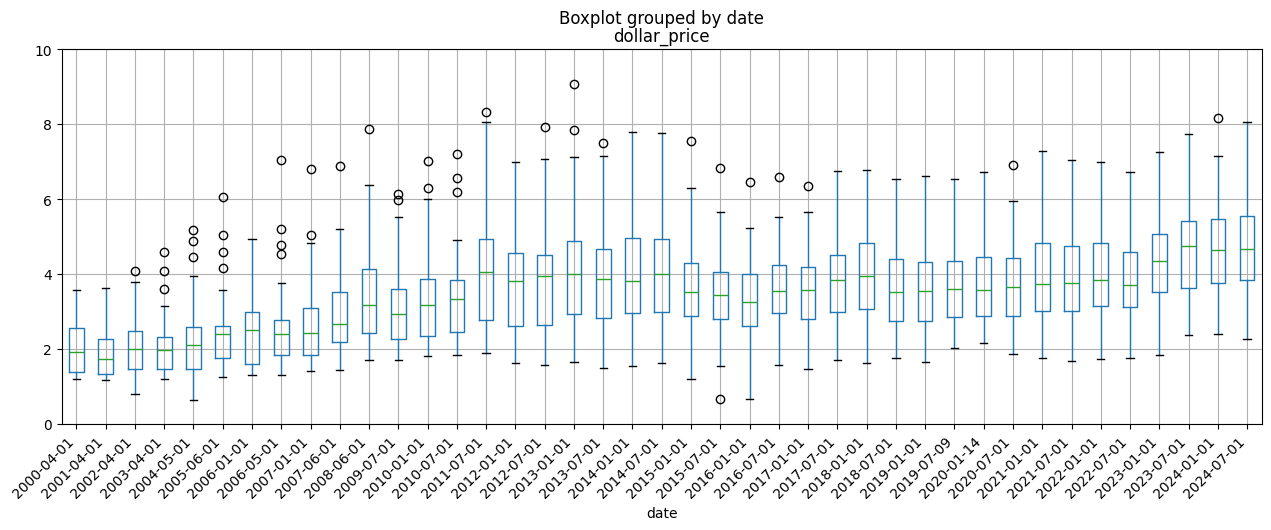

In [55]:
from matplotlib import pyplot as plt
f, a = plt.subplots(figsize=(15, 5))
df.boxplot(column=['dollar_price'], by='date', figsize=(15, 5), rot=45, ax=a)
a.set_xticklabels(labels=a.get_xticklabels(), ha='right')
plt.ylim([0, 10])
plt.show()

#### Other formats

# Other formats

- All widely used formats have a Python package to manipulate them
- xls, xlsx -> pandas, xlswriter
- pdf -> pdfminer.six
- ... (look for it when you need it)

#### Python packages dedicated to a website

# Wikipedia

In [56]:
from wikipedia import page
r = page("Python (programming language)")
print(r.summary)

Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation.
Python is dynamically typed and garbage-collected. It supports multiple programming paradigms, including structured (particularly procedural), object-oriented and functional programming. It is often described as a "batteries included" language due to its comprehensive standard library.
Guido van Rossum began working on Python in the late 1980s as a successor to the ABC programming language and first released it in 1991 as Python 0.9.0. Python 2.0 was released in 2000. Python 3.0, released in 2008, was a major revision not completely backward-compatible with earlier versions. Python 2.7.18, released in 2020, was the last release of Python 2.
Python consistently ranks as one of the most popular programming languages, and has gained widespread use in the machine learning community.




# Google Scholar

In [57]:
from scholarly import scholarly
searcher = next(scholarly.search_author("Sebastien Tixeuil"))
searcher['interests']

['Distributed Computing', 'Computer Networks', 'Algorithms & Theory']

In [58]:
searcher = next(scholarly.search_author("Fabien Mathieu"))
searcher['interests']

['Graphs', 'P2P networks', 'queuing systems', 'ranking algorithms']

## Server Side... next week!